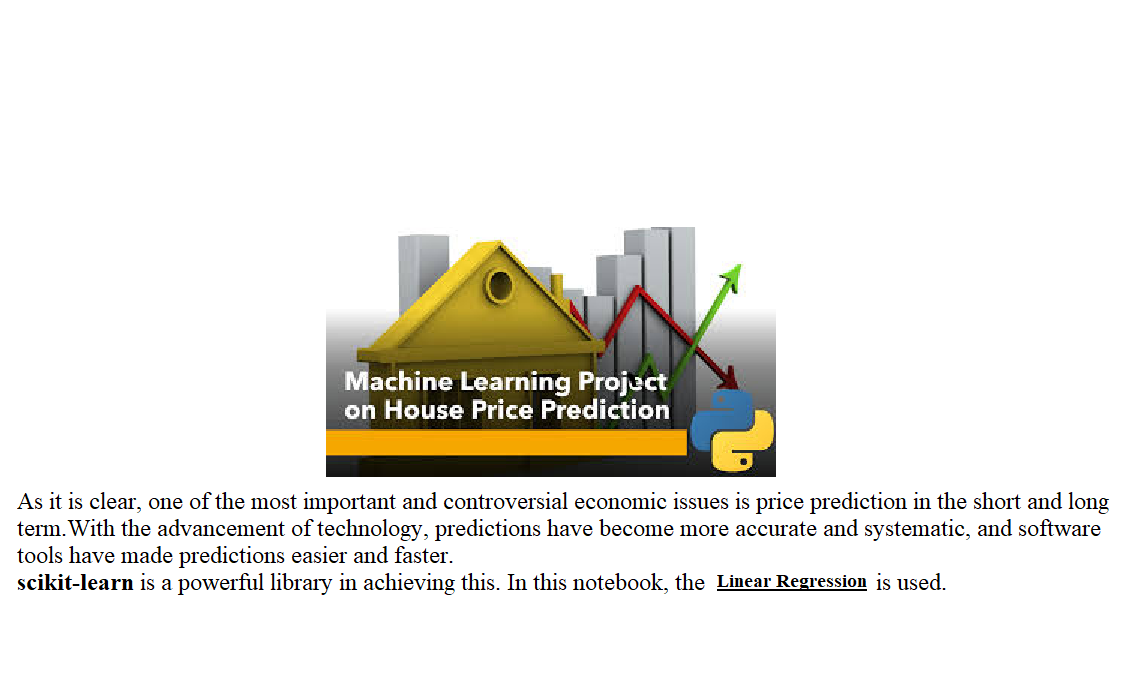

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Dataset

In [ ]:
df=pd.read_csv('/kaggle/input/real-estate-price-prediction/Real estate.csv')

# Data Overview

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.tail()

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(), annot= True)


# EDA

In [ ]:
sns.pairplot(df)

In [ ]:
plt.figure(figsize=(8,5))
sns.displot(df['Y house price of unit area'] , bins=40 , kde=True )

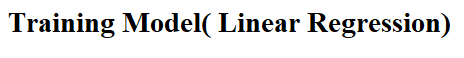


# Determine the Features & Label Variables

In [ ]:
X=df.drop('Y house price of unit area', axis=1)
y=df['Y house price of unit area']

In [ ]:
X.shape , y.shape

# Splitting Dataset into Training and Testing arrays


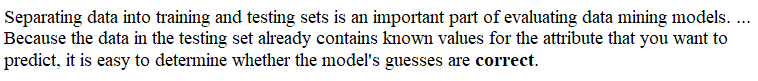

# In this step the data will split to training set and a testing set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train.shape , X_test.shape

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

# Model Evaluation

In [ ]:
model.coef_

In [ ]:
pd.DataFrame(model.coef_,X.columns,columns=['Coeficients'])

# Predictions

In [ ]:
y_pred=model.predict(X_test)


# Regression Evaluation Metrics

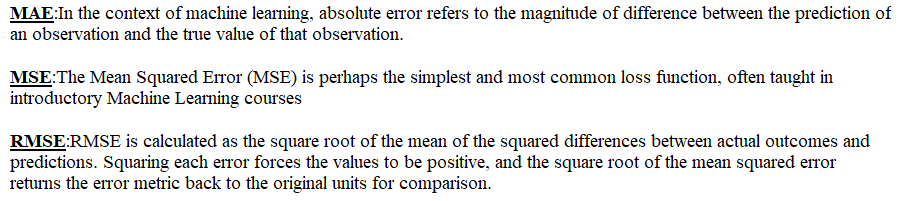

In [ ]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)

In [ ]:
print("MAE:",MAE,'\nMSE:',MSE,'\nRMSE:',RMSE)
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

In [ ]:
df['Y house price of unit area'].mean()

# Residuals

In [ ]:
test_residual= y_test - y_pred

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

In [ ]:
sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0, color='purple', ls='--')

In [ ]:
sns.displot(test_residual, bins=30, kde=True)